In [1]:
from scipy.io import loadmat
import numpy as np 
import sympy as sp
import matplotlib.pyplot as plt
from numpy.fft import fft
import pandas as pd
import os
figure_size = (6,4)


class Spectral:
    def __init__(self, folderpath):
        self.folderpath = folderpath
        self.coefficients = np.loadtxt('polynomial_coefficients_mean.txt')
        self.loaddata()
        self.n, self.nblock =  np.shape(self.u)
        self.dt = self.df.iloc[1, 0] - self.df.iloc[0, 0]
        self.fs = 1 / self.dt
        self.uf = self.u - self.u.mean()

    def loaddata(self):
        first = True
        for filename in os.listdir(self.folderpath):
            if filename.endswith(".csv"):
                filepath = os.path.join(self.folderpath, filename)
                self.df = pd.read_csv(filepath)
                V = self.df.iloc[:, 1].values
                u_temp = np.polyval(self.coefficients, V)
                
                if first:
                    self.u = u_temp
                    first = False
                else:
                    self.u = np.vstack((self.u,u_temp))
        self.u = np.transpose(self.u)


    def cal_auto_corr(self):
        all_autocorr = np.zeros((self.n, self.nblock))
        for i in range(self.nblock):
            temp = np.correlate(self.uf[:,i], self.uf[:,i], mode='full') / self.n
            all_autocorr[:,i] = temp[self.n-1:] / temp.max()  

        self.auto_corr = np.mean(all_autocorr,axis=1)

    def plot_autocorr(self):
        plt.figure(figsize=figure_size)  # Set the size of the graph
        plt.semilogx(np.arange(self.n)*self.dt,self.auto_corr)
        plt.axhline(y=0, color='r', linestyle='--')  # Add a line at y=0
        plt.title('Autocorrelation of u Fluctuations')
        plt.xlabel('Time (s)')
        plt.ylabel('Autocorrelation')
        plt.show()

    def cal_fft(self):
        self.f = np.arange(self.n) / (self.n * self.dt)
        spectrum_blocks = np.zeros((self.n, self.nblock))
        for i in range(self.nblock):
            uft = self.dt * fft(self.uf[:,i])
            s = uft * uft.conjugate() / (self.n * self.dt)
            spectrum_blocks[:,i] = s.real
        self.spectrum = spectrum_blocks.mean(1)

    def save_processed_data(self,name):
        np.savetxt(name, np.transpose([self.f, self.spectrum, self.auto_corr]))

In [2]:
normal = Spectral("Measurement\Data\VortexUden")
vortex = Spectral("Measurement\Data\Vortex1")


In [3]:
normal.cal_auto_corr()
normal.cal_fft()

vortex.cal_auto_corr()
vortex.cal_fft()

**Means over all the blocks**

In [35]:
""" all_means = np.mean(vortex.u,axis=0)
plt.figure(figsize=figure_size)  # Set the size of the graph
plt.plot(range(1,vortex.nblock+1),all_means)
plt.title('Mean Values of u')
plt.xlabel('Block Number')
plt.ylabel('Mean Value')
plt.show() """


" all_means = np.mean(vortex.u,axis=0)\nplt.figure(figsize=figure_size)  # Set the size of the graph\nplt.plot(range(1,vortex.nblock+1),all_means)\nplt.title('Mean Values of u')\nplt.xlabel('Block Number')\nplt.ylabel('Mean Value')\nplt.show() "

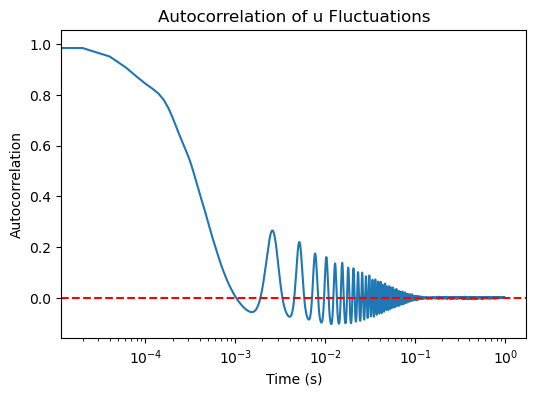

In [4]:
vortex.plot_autocorr()

**Spectral plot**

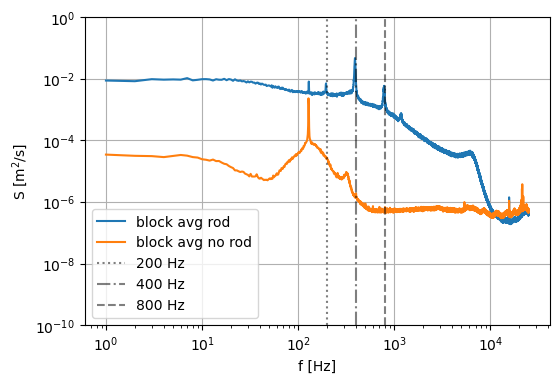

In [5]:
plt.figure(figsize=figure_size)
#plt.loglog(f[1:n//2], spectrum_blocks[1:n//2,0], linewidth=0.5, label='single block')
plt.loglog(vortex.f[1:vortex.n//2], vortex.spectrum[1:vortex.n//2], color ='tab:blue' , linestyle = '-', label='block avg rod')
plt.loglog(normal.f[1:vortex.n//2], normal.spectrum[1:normal.n//2], color ='tab:orange' , linestyle = '-', label='block avg no rod')
plt.xlabel('f [Hz]')
plt.ylabel(u'S [m$^2$/s]')
#plt.title('Spectral Plot')
plt.grid()

plt.axvline(x=200, color='k', linestyle=':', label='200 Hz', alpha=0.5)
plt.axvline(x=400, color='k', linestyle='-.', label='400 Hz', alpha=0.5)
plt.axvline(x=800, color='k', linestyle='--', label='800 Hz', alpha=0.5)

plt.legend()
plt.ylim( 1e-10,1)

plt.show()


